#Word2Vec from scratch


#prénom/nom: Julien VU

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
corpus = "Mr et Mrs Dursley, qui habitaient au 4, Privet Drive, avaient toujours affirmé avec la plus grande fierté qu'ils étaient parfaitement normaux, merci pour eux. Jamais quiconque n'aurait imaginé qu'ils puissent se trouver impliqués dans quoi que ce soit d'étrange ou de mystérieux. Ils n'avaient pas de temps à perdre avec des sornettes. Mr Dursley dirigeait la Grunnings, une entreprise qui fabriquait des perceuses. C'était un homme grand et massif, qui n'avait pratiquement pas de cou, mais possédait en revanche une moustache de belle taille. Mrs Dursley, quant à elle, était mince et blonde et disposait d'un cou deux fois plus long que la moyenne, ce qui lui était fort utile pour espionner ses voisins en regardant par-dessus les clôtures des jardins. Les Dursley avaient un petit garçon prénommé Dudley et c'était à leurs yeux le plus bel enfant du monde. Les Dursley avaient tout ce qu'ils voulaient. La seule chose indésirable qu'ils possédaient, c'était un secret dont ils craignaient plus que tout qu'on le découvre un jour. Si jamais quiconque venait à entendre parler des Potter, ils étaient convaincus qu'ils ne s'en remettraient pas. Mrs Potter était la sœur de Mrs Dursley, mais toutes deux ne s'étaient plus revues depuis des années. En fait, Mrs Dursley faisait comme si elle était fille unique, car sa sœur et son bon à rien de mari étaient aussi éloignés que possible de tout ce qui faisait un Dursley. Les Dursley tremblaient d'épouvante à la pensée de ce que diraient les voisins si par malheur les Potter se montraient dans leur rue. Ils savaient que les Potter, eux aussi, avaient un petit garçon, mais ils ne l'avaient jamais vu. Son existence constituait une raison supplémentaire de tenir les Potter à distance: il n'était pas question que le petit Dudley se mette à fréquenter un enfant comme celui-là. Lorsque Mr et Mrs Dursley s'éveillèrent, au matin du mardi où commence cette histoire, il faisait gris et triste et rien dans le ciel nuageux ne laissait prévoir que des choses étranges et mystérieuses allaient bientôt se produire dans tout le pays. Mr Dursley fredonnait un air en nouant sa cravate la plus sinistre pour aller travailler et Mrs Dursley racontait d'un ton badin les derniers potins du quartier en s'efforçant d'installer sur sa chaise de bébé le jeune Dudley qui braillait de toute la force de ses poumons. Aucun d'eux ne remarqua le gros hibou au plumage mordoré qui voleta devant la fenêtre. A huit heures et demie, Mr Dursley prit son attaché-case, déposa un baiser sur la joue de Mrs Dursley et essaya d'embrasser Dudley, mais sans succès, car celui-ci était en proie à une petite crise de colère et s'appliquait à jeter contre les murs de la pièce le contenu de son assiette de céréales. —Sacré petit bonhomme, gloussa Mr Dursley en quittant la maison. Il monta dans sa voiture et recula le long de l'allée qui menait à sa maison.  Ce fut au coin de la rue qu'il remarqua pour la première fois un détail insolite: un chat qui lisait une carte routière. Pendant un instant, Mr Dursley ne comprit pas très bien ce qu'il venait de voir. Il tourna alors la tête pour regarder une deuxième fois. Il y avait bien un chat tigré, assis au coin de Privet Drive, mais pas la moindre trace de carte routière. Qu'est-ce qui avait bien pu lui passer par la tête ? Il avait dû se laisser abuser par un reflet du soleil sur le trottoir. Mr Dursley cligna des yeux et regarda fixement le chat. Celui-ci soutint son regard. Tandis qu'il tournait le coin de la rue et s'engageait sur la route, Mr Dursley continua d'observer le chat dans son rétroviseur. L'animal était en train de lire la plaque qui indiquait « Privet Drive »—mais non, voyons, il ne lisait pas, il regardait la plaque. Les chats sont incapables de lire des cartes ou des écriteaux. Mr Dursley se ressaisit et chassa le chat tigré de son esprit. Durant le trajet qui le menait vers la ville, il concentra ses pensées sur la grosse commande de perceuses qu'il espérait obtenir ce jour-là. Mais lorsqu'il parvint aux abords de la ville quelque chose d'autre chassa les perceuses de sa tête. Assis au milieu des habituels embouteillages du matin, il fut bien forcé de remarquer la présence de plusieurs passants vêtus d'une étrange façon: ils portaient des capes. Mr Dursley ne supportait pas les gens qui s'habillaient d'une manière extravagante—les jeunes avaient parfois de ces accoutrements ! Il pensa qu'il s'agissait d'une nouvelle mode particulièrement stupide. Il pianota sur le volant de sa voiture et son regard rencontra un groupe de ces olibrius qui se chuchotaient des choses à l'oreille d'un air surexcité. Mr Dursley s'irrita en voyant que deux d'entre eux n'étaient pas jeunes du tout. Cet homme, là-bas, était sûrement plus âgé que lui, ce qui ne l'empêchait pas de porter une cape vert émeraude ! Quelle impudence ! Mr Dursley pensa alors qu'il devait y avoir une animation de rue—ces gens étaient probablement là pour collecter de l'argent au profit d'une œuvre quelconque. Ce ne pouvait être que ça. La file des voitures se remit en mouvement et quelques minutes plus tard, Mr Dursley se rangea dans le parking de la Grunnings. Les perceuses avaient repris leur place dans ses pensées. Dans son bureau du huitième étage, Mr Dursley s'asseyait toujours dos à la fenêtre. S'il en avait été autrement, il aurait sans doute eu un peu plus de mal que d'habitude à se concentrer sur ses perceuses, ce matin-là. Il ne vit pas les hiboux qui volaient à tire-d'aile en plein jour. Mais en bas, dans la rue, les passants, eux, les voyaient bel et bien. Bouche bée, ils pointaient le doigt vers le ciel, tandis que les rapaces filaient au-dessus de leur tête. La plupart d'entre eux n'avaient jamais vu de hibou, même la nuit. Mr Dursley, cependant, ne remarqua rien d'anormal et aucun hibou ne vint troubler sa matinée. Il réprimanda vertement une demidouzaine de ses employés, passa plusieurs coups de fil importants et poussa quelques hurlements supplémentaires. Il se sentit d'excellente humeur jusqu'à l'heure du déjeuner où il songea qu'il serait bon de se dégourdir un peu les jambes. Il traversa alors la rue pour aller s'acheter quelque chose à manger chez le boulanger d'en face. Les passants vêtus de capes lui étaient complètement sortis de la tête, mais lorsqu'il en vit à nouveau quelques-uns à proximité de la boulangerie, il passa devant eux en leur lançant un regard courroucé. Il ignorait pourquoi, mais ils le mettaient mal à l'aise. Ceux-là aussi chuchotaient d'un air surexcité et il ne vit pas la moindre boîte destinée à récolter de l'argent. Quand il sortit de la boutique avec un gros beignet enveloppé dans un sac, il entendit quelques mots de leur conversation. —Les Potter, c'est ça, c'est ce que j'ai entendu dire... —Oui, leur fils, Harry...  Mr Dursley s'immobilisa, envahi par une peur soudaine. Il tourna la tête vers les gens qui chuchotaient comme s'il s'apprêtait à leur dire quelque chose, mais il se ravisa. Il traversa la maison toute hâte, se dépêcha de remonter dans son bureau, ordonna d'un ton sec à sa secrétaire de ne pas le déranger, saisit son téléphone et avait presque fini de composer le numéro de sa maison lorsqu'il changea d'avis. Il reposa le combiné et se caressa la moustache. Il réfléchissait... non, décidément, il était idiot. Potter n'était pas un nom si rare. On pouvait être sûr qu'un grand nombre de Potter avaient un fils prénommé Harry Et quand il y repensait, il n'était même pas certain que son neveu se prénomme véritablement Harry. Il n'avait même jamais vu cet enfant. Après tout, il s'appelait peut-être Harvey. Ou Harold. Il était inutile d'inquiéter Mrs Dursley pour si peu. Toute allusion à sa sœur la mettait dans un tel état ! Et il ne pouvait pas lui en vouloir. Si lui-même avait eu une sœur comme celle-là... mais enfin quand même, tous ces gens vêtus de capes... Cet après-midi là, il lui fut beaucoup plus difficile de se concentrer sur ses perceuses et lorsqu'il quitta les bureaux à cinq heures, il était encore si préoccupé qu'il heurta quelqu'un devant la porte. —Navré, grommela-t-il au vieil homme minuscule qu'il avait manqué de faire tomber. Il se passa quelques secondes avant que Mr Dursley se rende compte que l'homme portait une cape violette. Le fait d'avoir été ainsi bousculé ne semblait pas avoir affecté son humeur. Au contraire, son visage se fendit d'un large sourire tandis qu'il répondait d'une petite voix perçante qui lui attira le regard des passants: —Ne soyez pas navré, mon cher Monsieur. Rien aujourd'hui ne saurait me mettre en colère. Réjouissez-vous, puisque Vous-Savez-Qui a enfin disparu. Même les Moldus comme vous devraient fêter cet heureux, très heureux jour ! Le vieil homme prit alors Mr Dursley par la taille et le serra contre lui avant de poursuivre son chemin. Mr Dursley resta cloué sur place. Quelqu'un qu'il n'avait jamais vu venait de le prendre dans ses bras. Et l'avait appelé « Moldu », ce qui n'avait aucun sens. Il en était tout retourné et se dépêcha de remonter dans sa voiture. Il prit alors le chemin de sa maison en espérant qu'il avait été victime de son imagination. C'était bien la première fois qu'il espérait une chose pareille, car il détestait tout ce qui avait trait à l'imagination. Lorsqu'il s'engagea dans l'allée du numéro 4 de sa rue, la première chose qu'il vit—et qui n'améliora pas son humeur—ce fut le chat tigré qu'il avait déjà remarqué le matin même. A présent, l'animal était assis sur le mur de son jardin. Il était sûr qu'il s'agissait bien du même chat. Il reconnaissait les dessins de son pelage autour des yeux. —Allez, ouste ! s'exclama Mr Dursley. Le chat ne bougea pas. Il se contenta de le regarder d'un air sévère. Mr Dursley se demanda si c'était un comportement normal pour un chat. Essayant de reprendre contenance, il entra dans sa maison, toujours décidé à ne rien révéler à sa femme.  Mrs Dursley avait passé une journée agréable et parfaitement normale. Au cours du dîner, elle lui raconta tous les problèmes que la voisine d'à côté avait avec sa fille et lui signala également que Dudley avait appris un nouveau moi: « Veux pas ! ». Mr Dursley s'efforça de se conduire le plus normalement du monde et après que Dudley eut été mis au lit, il s'installa dans le salon pour regarder la fin du journal télévisé. —D'après des témoignages venus de diverses régions, il semblerait que les hiboux se soient comportés d'une bien étrange manière au cours de la journée, dit le présentateur. Normalement, les hiboux sont des rapaces nocturnes qui attendent la nuit pour chasser leurs proies. Il est rare d'en voir en plein jour. Or, aujourd'hui, des centaines de témoins ont vu ces oiseaux voler un peu partout depuis le lever du soleil. Les experts interrogés ont été incapables d'expliquer les raisons de ce changement de comportement pour le moins étonnant. Voilà qui est bien mystérieux, conclut le présentateur en s'autorisant un sourire. Et maintenant, voici venue l'heure de la météo, avec les prévisions de Jim McGuffin. Alors, Jim, est-ce qu'on doit s'attendre à d'autres chutes de hiboux au cours de la nuit prochaine ? —Ça, je serais bien incapable de vous le dire, Ted, répondit l'homme de la météo, mais sachez en tout cas que les hiboux n'ont pas été les seuls à se comporter d'une étrange manière. Des téléspectateurs qui habitent dans des régions aussi éloignées les unes des autres que le Kent, le Yorkshire et la côte est de l'Écosse m'ont téléphoné pour me dire qu'au lieu des averses que j'avais prévues pour aujourd'hui, ils ont vu de véritables pluies d'étoiles filantes ! Peut-être s'agissait-il de feux de joie, bien que ce ne soit pas encore la saison. Quoi qu'il en soit, vous pouvez être sûrs que le temps de la nuit prochaine sera très humide. Mr Dursley se figea dans son fauteuil, Des pluies d'étoiles filantes sur tout le pays ? Des hiboux qui volent en plein jour ? Des gens bizarres vêtus de capes ? Et ces murmures, ces murmures sur les Potter... Mrs Dursley entra dans le salon avec deux tasses de thé. Décidément, il y avait quelque chose qui n'allait pas. Il fallait lui en parler. Mr Dursley, un peu nerveux, s'éclaircit la gorge. —Euh... Pétunia, ma chérie, dit-il, tu n'as pas eu de nouvelles de ta sœur récemment ? Comme il s'y attendait, son épouse parut choquée et furieuse. Elle faisait toujours semblant de ne pas avoir de sœur. —Non, répondit-elle sèchement. Pourquoi ? —Ils ont dit un truc bizarre à la télé, grommela Mr Dursley. Des histoires de hiboux,.. d' étoiles filantes... et il y avait tout un tas de gens qui avaient un drôle d'air aujourd'hui. —Et alors ? lança Mrs Dursley. —Rien, je me disais que... peut-être... ça avait quelque chose à voir avec... sa bande... Mrs Dursley retroussait les lèvres en buvant son thé à petites gorgées. Son mari se demanda s'il allait oser lui raconter qu'il avait entendu prononcer le nom de « Potter ». Il préféra s'en abstenir. D'un air aussi détaché que possible, il dit: —Leur fils... Il a à peu près le même âge que Dudley, non ?  —J'imagine, répliqua Mrs Dursley avec raideur. —Comment s'appelle-t-il, déjà ? Howard, c'est ça ? —Harry. Un nom très ordinaire, très désagréable, si tu veux mon avis. —Ah oui, répondit Mr Dursley en sentant son cœur s'arrêter. Oui, je suis d'accord avec toi. Il ne dit pas un moi de plus à ce sujet tandis qu'ils montaient l'escalier pour aller se coucher. Pendant que Mrs Dursley était dans la salle de bains, Mr Dursley se glissa vers la fenêtre de la chambre et jeta un coup d'œil dans le jardin. Le chat était toujours là. Il regardait dans la rue comme s'il attendait quelqu'un. Mr Dursley imaginait-il des choses ? Tout cela avait-il un lien avec les Potter ? Si c'était le cas... S'il s'avérait qu'ils étaient parents avec des... Non, il ne pourrait jamais le supporter, Les Dursley se mirent au lit. Mrs Dursley s'endormit très vite mais son mari resta éveillé, retournant dans sa tête les événements de la journée. La seule pensée qui le consola avant de sombrer enfin dans le sommeil, ce fut que même si les Potter avaient vraiment quelque chose à voir avec ce qui s'était passé, il n'y avait aucune raison pour que lui et sa femme en subissent les conséquences. Les Potter savaient parfaitement ce que Pétunia et lui pensaient des gens de leur espèce... Et il ne voyait pas comment tous deux pourraient être mêlés à ces histoires. Il bâilla et se retourna. Rien de tout cela ne pouvait les affecter. Et il avait grand tort de penser ainsi. Tandis que Mr Dursley se laissait emporter dans un sommeil quelque peu agité, le chat sur le mur, lui, ne montrait aucun signe de somnolence. Il restait assis, immobile comme une statue, fixant de ses yeux grands ouverts le coin de Privet Drive. Il n'eut pas la moindre réaction lorsqu'une portière de voiture claqua dans la rue voisine, ni quand deux hiboux passèrent audessus de sa tête. Il était presque minuit quand il bougea enfin. Un homme apparut à l'angle de la rue que le chat avait observé pendant tout ce temps. Il apparut si soudainement et dans un tel silence qu'il semblait avoir jailli du sol. La queue du chat frémit, ses yeux se rétrécirent. On n'avait encore jamais vu dans Privet Drive quelque chose qui ressemblât à cet homme. Il était grand, mince et très vieux, à en juger par la couleur argentée de ses cheveux et de sa barbe qui lui descendaient jusqu'à la taille. Il était vêtu d'une longue robe, d'une cape violette qui balayait le sol et chaussé de bottes à hauts talons munies de boucles. Ses yeux bleus et brillants étincelaient derrière des lunettes en demi-lune et son long nez crochu donnait l'impression d'avoir été cassé au moins deux fois. Cet homme s'appelait Albus Dumbledore. Albus Dumbledore n'avait pas l'air de se rendre compte qu'il venait d'arriver dans une rue où tout en lui, depuis son nom jusqu'à ses bottes, ne pouvait être qu'indésirable. Il était occupé à chercher quelque chose dans sa longue cape, mais sembla s'apercevoir qu'il était observé, car il leva brusquement les yeux vers le chat qui avait toujours le regard fixé sur lui à l'autre bout de la rue. Pour une raison quelconque, la vue du chat parut l'amuser. Il eut un petit rire et marmonna:  —J'aurais dû m'en douter. Il avait trouvé ce qu'il cherchait dans une poche intérieure, Apparemment, il s'agissait d'un briquet en argent. Il en releva le capuchon, le tendit au-dessus de sa tête et l'alluma. Le réverbère le plus proche s'éteignit alors avec un petit claquement. L'homme alluma à nouveau le briquet : le réverbère suivant s'éteignit à son tour. Douze fois, il actionna ainsi l'Éteignoir jusqu'à ce qu'il ne reste plus aucune lumière dans la rue, à part deux points minuscules qui brillaient au loin: c'étaient les yeux du chat, toujours fixés sur lui. Quiconque aurait regardé par une fenêtre en cet instant, même Mrs Dursley et ses petits yeux perçants, aurait été incapable de voir le moindre détail de ce qui se passait dans la rue. Dumbledore rangea son Éteignoir dans la poche de sa cape et marcha en direction du numéro 4. Lorsqu'il y fut parvenu, il s'assit sur le muret, à côté du chat. Il ne lui accorda pas un regard, mais après un moment de silence, il lui parla: —C'est amusant de vous voir ici, professeur McGonagall, dit-il. Il tourna la tête pour adresser un sourire au chat tigré, mais celui-ci avait disparu. Dumbledore souriait à présent à une femme d'allure sévère avec des lunettes carrées qui avaient exactement la même forme que les motifs autour des yeux du chat. Elle aussi portait une cape, d'un vert émeraude. Ses cheveux étaient tirés en un chignon serré et elle avait l'air singulièrement agacée. —Comment avez-vous su que c'était moi ? demanda-t-elle. —Mon cher professeur, je n'ai jamais vu un chat se tenir d'une manière aussi raide. —Vous aussi, vous seriez un peu raide si vous restiez assis toute une journée sur un mur de briques, répondit le professeur McGonagall. —Toute la journée ? Alors que vous auriez pu célébrer l'événement avec les autres ? En venant ici, j'ai dû voir une bonne douzaine de fêtes et de banquets. Le professeur McGonagall renifla d'un air courroucé. —Oui, oui, je sais, tout le monde fait la fête, dit-elle avec agacement. On aurait pu penser qu'ils seraient plus prudents, mais non, pas du tout ! Même les Moldus ont remarqué qu'il se passait quelque chose. Ils en ont parlé aux nouvelles. Elle montra d'un signe de tête la fenêtre du salon des Dursley, plongé dans l'obscurité. —Je l'ai entendu moi-même. Ils ont signalé des vols de hiboux... des pluies d'étoiles filantes... Les Moldus ne sont pas complètement idiots. Il était inévitable qu'ils s'en aperçoivent. Des étoiles filantes dans le Kent ! Je parie que c'est encore un coup de Dedalus Diggle. Il n'a jamais eu beaucoup de jugeote. —On ne peut pas leur en vouloir, dit Dumbledore avec douceur Nous n'avons pas eu grandchose à célébrer depuis onze ans. —Je sais, répliqua le professeur McGonagall d'un ton sévère, mais ce n'est pas une raison pour perdre la tête. Tous ces gens ont été d'une imprudence folle. Se promener dans les rues  en plein jour, à s'échanger les dernières nouvelles sans même prendre la précaution de s'habiller comme des Moldus ! Elle lança un regard oblique et perçant à Dumbledore, comme si elle espérait qu'il allait dire quelque chose, mais il garda le silence. —Nous serions dans de beaux draps, reprit-elle alors, si le jour où Vous-Savez-Qui semble enfin avoir disparu, les Moldus s'apercevaient de notre existence. J'imagine qu'il a vraiment disparu, n'est-ce pas, Dumbledore ? —Il semble qu'il en soit ainsi, en effet, assura Dumbledore. Et nous avons tout lieu de nous en féliciter. Que diriez-vous d'un esquimau au citron ? —Un quoi ? —Un esquimau au citron. C'est une friandise que fabriquent les Moldus et je dois dire que c'est plutôt bon. —Merci, pas pour moi, répondit froidement le professeur McGonagall qui semblait estimer que le moment n'était pas venu de manger des glaces au citron. Je vous disais donc que même si Vous-Savez-Qui est vraiment parti... —Mon cher professeur, quelqu'un d'aussi raisonnable que vous ne devrait pas hésiter à prononcer son nom, ne croyez-vous pas ? Cette façon de dire tout le temps « Vous-Savez-Qui » n'a aucun sens. Pendant onze ans, j'ai essayé de convaincre les gens de l'appeler par son nom: Voldemort. Le professeur McGonagall fit une grimace, mais Dumbledore qui avait sorti deux esquimaux au citron ne parut pas le remarquer. —Si nous continuons à dire « Vous-Savez-Qui », nous allons finir par créer la confusion. Je ne vois aucune raison d'avoir peur de prononcer le nom de Voldemort. —Je sais bien que vous n'en voyez pas, répliqua le professeur McGonagall qui semblait moitié exaspérée, moitié admirative. Mais, vous, vous êtes différent des autres. Tout le monde sait que vous êtes le seul à avoir jamais fait peur à Vous-Savez-Qui... ou à Voldemort, si vous y tenez. —Vous me flattez, dit Dumbledore d'une voix tranquille. Voldemort dispose de pouvoirs que je n'ai jamais eus. —C'est simplement parce que vous avez trop de... disons de noblesse pour en faire usage. —Heureusement qu'il fait nuit. Je n'ai jamais autant rougi depuis le jour où Madame Pomfresh m'a dit qu'elle trouvait mes nouveaux cache-oreilles ravissants. Le professeur McGonagall lança un regard perçant à Dumbledore. —Les hiboux, ce n'est rien comparé aux rumeurs qui circulent, déclara-t-elle. Vous savez ce que tout le monde dit sur les raisons de sa disparition ? Ce qui a fini par l'arrêter ?  Apparemment, le professeur McGonagall venait d'aborder le sujet qui lui tenait le plus à cœur, la véritable raison qui l'avait décidée à attendre toute la journée, assise sur un mur glacial. Car jamais un chat ni une femme n'avait fixé Dumbledore d'un regard aussi pénétrant que celui du professeur en cet instant. A l'évidence, elle n'avait pas l'intention de croire ce que « tout le monde » disait tant que Dumbledore ne lui aurait pas confirme qu'il s'agissait bien de la vérité. Dumbledore, cependant, était occupé à choisir un autre esquimau et ne lui répondit pas. —Ce qu'ils disent, poursuivit le professeur, c'est que Voldemort est venu hier soir à Godric's Hollow pour y chercher les Potter. D'après la rumeur, Lily et James Potter sont... enfin, on dit qu'ils sont... morts... Dumbledore inclina la tête. Le professeur McGonagall avait du mal à reprendre sa respiration. —Lily et James... Je n'arrive pas à y croire... Je ne voulais pas l'admettre... Oh, Albus... Dumbledore tendit la main et lui tapota l'épaule. —Je sais... Je sais... dit-il gravement. —Et ce n'est pas tout, reprit le professeur McGonagall d'une voix tremblante. On dit qu'il a essayé de tuer Harry, le fils des Potter. Mais il en a été incapable. Il n'a pas réussi à supprimer ce bambin. Personne ne sait pourquoi ni comment, mais tout le monde raconte que lorsqu'il a essayé de tuer Harry Potter sans y parvenir, le pouvoir de Voldemort s'est brisé, pour ainsi dire—et c'est pour ça qu'il a... disparu. Dumbledore hocha la tête d'un air sombre. —C'est... c'est vrai ? bredouilla le professeur McGonagall. Après tout ce qu'il a fait.. tous les gens qu'il a tués ... il n'a pas réussi à tuer un petit garçon ? C'est stupéfiant ... rien d'autre n'avait pu l'arrêter... mais, au nom du ciel, comment se fait-il que Harry ait pu survivre ? —On ne peut faire que des suppositions, répondit Dumbledore. On ne saura peut-être jamais. Le professeur McGonagall sortit un mouchoir en dentelle et s'essuya les yeux sous ses lunettes. Dumbledore inspira longuement en prenant dans sa poche une montre en or qu'il consulta. C'était une montre très étrange. Elle avait douze aiguilles, mais pas de chiffres. A la place, il y avait des petites planètes qui tournaient au bord du cadran. Tout cela devait avoir un sens pour Dumbledore car il remit la montre dans sa poche en disant: —Hagrid est en retard. Au fait, j'imagine que c'est lui qui vous a dit que je serais ici ? —Oui, admit le professeur McGonagall, et je suppose que vous n'avez pas l'intention de me dire pour quelle raison vous êtes venu dans cet endroit précis ? —Je suis venu confier Harry à sa tante et à son oncle. C'est la seule famille qui lui reste désormais. —Vous voulez dire... non, ce n'est pas possible ! Pas les gens qui habitent dans cette maison ! s'écria le professeur McGonagall en se levant d'un bond, le doigt pointé sur le numéro 4 de la rue. Dumbledore... vous ne pouvez pas faire une chose pareille ! Je les ai observés toute la  journée. On ne peut pas imaginer des gens plus différents de nous. En plus, ils ont un fils... je l'ai vu donner des coups de pied à sa mère tout au long de la rue en hurlant pour réclamer des bonbons. Harry Potter, venir vivre ici ! —C'est le meilleur endroit pour lui, répliqua Dumbledore d'un ton ferme. Son oncle et sa tante lui expliqueront tout quand il sera plus grand. Je leur ai écrit une lettre. —Une lettre ? répéta le professeur McGonagall d'une voix éteinte en se rasseyant sur le muret. Dumbledore, vous croyez vraiment qu'il est possible d'expliquer tout cela dans une lettre ? Des gens pareils seront incapables de comprendre ce garçon ! Il va devenir célèbre— une véritable légende vivante—je ne serais pas étonnée que la date d'aujourd'hui devienne dans l'avenir la fête de Harry Potter. On écrira des livres sur lui. Tous les enfants de notre monde connaîtront son nom ! —C'est vrai, dit Dumbledore en la regardant d'un air très sérieux par-dessus ses lunettes en demi-lune. Il y aurait de quoi tourner la tête de n'importe quel enfant. Être célèbre avant même d'avoir appris à marcher et à parler ! Célèbre pour quelque chose dont il ne sera même pas capable de se souvenir ! Ne comprenez-vous pas qu'il vaut beaucoup mieux pour lui qu'il grandisse à l'écart de tout cela jusqu'à ce qu'il soit prêt à l'assumer ? Le professeur McGonagall ouvrit la bouche. Elle parut changer d'avis, avala sa salive et répondit: —Oui... Oui, bien sûr, vous avez raison. Mais comment l'enfant va-t-il arriver jusqu'ici, Dumbledore ? Elle regarda soudain sa cape comme si elle pensait que Harry était peut-être caché dessous. —C'est Hagrid qui doit l'amener, dit Dumbledore. —Et vous croyez qu'il est... sage de confier une tâche importante à Hagrid ? Je confierais ma propre vie à Hagrid, assura Dumbledore. —Je ne dis pas qu'il manque de cœur, répondit le professeur McGonagall avec réticence, mais reconnaissez qu'il est passablement négligent. Il a tendance à... Qu'est-ce que c'est que ça ? Un grondement sourd avait brisé le silence de la nuit. Le bruit augmenta d'intensité tandis qu'ils scrutaient la rue des deux côtés pour essayer d'apercevoir la lueur d'un phare. Le grondement se transforma en pétarade au-dessus de leur tête. Ils levèrent alors les yeux et virent une énorme moto tomber du ciel et atterrir devant eux sur la chaussée. La moto était énorme, mais ce n'était rien comparé à l'homme qui était assis dessus. Il était à peu près deux fois plus grand que la moyenne et au moins cinq fois plus large. Il était même tellement grand qu'on avait peine à le croire. On aurait dit un sauvage, avec ses longs cheveux noirs en broussaille, sa barbe qui cachait presque entièrement son visage, ses mains de la taille d'un couvercle de poubelle et ses pieds chaussés de bottes en cuir qui avaient l'air de bébés dauphins. L'homme tenait un tas de couvertures dans ses immenses bras musculeux. "

In [ ]:
print(corpus)

Mr et Mrs Dursley, qui habitaient au 4, Privet Drive, avaient toujours affirmé avec la plus grande fierté qu'ils étaient parfaitement normaux, merci pour eux. Jamais quiconque n'aurait imaginé qu'ils puissent se trouver impliqués dans quoi que ce soit d'étrange ou de mystérieux. Ils n'avaient pas de temps à perdre avec des sornettes. Mr Dursley dirigeait la Grunnings, une entreprise qui fabriquait des perceuses. C'était un homme grand et massif, qui n'avait pratiquement pas de cou, mais possédait en revanche une moustache de belle taille. Mrs Dursley, quant à elle, était mince et blonde et disposait d'un cou deux fois plus long que la moyenne, ce qui lui était fort utile pour espionner ses voisins en regardant par-dessus les clôtures des jardins. Les Dursley avaient un petit garçon prénommé Dudley et c'était à leurs yeux le plus bel enfant du monde. Les Dursley avaient tout ce qu'ils voulaient. La seule chose indésirable qu'ils possédaient, c'était un secret dont ils craignaient plus q

### Clean the data


*   Replace all the "?" and "!" by "."
*   Remove all the ","
*   Remove all the "-"
*   And everything else you consider useful



In [ ]:
#Replace all the ? and ! by .,Remove all the ,Remove all the -
cleaned_data = corpus.replace('!', '.').replace('?', '.').replace(',', '').replace('-','').replace('\'','').replace('—','').replace('...','.').replace(':','')
print(cleaned_data)




Mr et Mrs Dursley qui habitaient au 4 Privet Drive avaient toujours affirmé avec la plus grande fierté quils étaient parfaitement normaux merci pour eux. Jamais quiconque naurait imaginé quils puissent se trouver impliqués dans quoi que ce soit détrange ou de mystérieux. Ils navaient pas de temps à perdre avec des sornettes. Mr Dursley dirigeait la Grunnings une entreprise qui fabriquait des perceuses. Cétait un homme grand et massif qui navait pratiquement pas de cou mais possédait en revanche une moustache de belle taille. Mrs Dursley quant à elle était mince et blonde et disposait dun cou deux fois plus long que la moyenne ce qui lui était fort utile pour espionner ses voisins en regardant pardessus les clôtures des jardins. Les Dursley avaient un petit garçon prénommé Dudley et cétait à leurs yeux le plus bel enfant du monde. Les Dursley avaient tout ce quils voulaient. La seule chose indésirable quils possédaient cétait un secret dont ils craignaient plus que tout quon le découvre

### Get all unique words to create the vocabulary

In [ ]:
#Replace . par espace pour faire en sorte que le point soit seul et détaché du mot
V =cleaned_data.replace('.', '').split()
print("corpus avec des mots uniques",V)


corpus avec des mots uniques ['Mr', 'et', 'Mrs', 'Dursley', 'qui', 'habitaient', 'au', '4', 'Privet', 'Drive', 'avaient', 'toujours', 'affirmé', 'avec', 'la', 'plus', 'grande', 'fierté', 'quils', 'étaient', 'parfaitement', 'normaux', 'merci', 'pour', 'eux', 'Jamais', 'quiconque', 'naurait', 'imaginé', 'quils', 'puissent', 'se', 'trouver', 'impliqués', 'dans', 'quoi', 'que', 'ce', 'soit', 'détrange', 'ou', 'de', 'mystérieux', 'Ils', 'navaient', 'pas', 'de', 'temps', 'à', 'perdre', 'avec', 'des', 'sornettes', 'Mr', 'Dursley', 'dirigeait', 'la', 'Grunnings', 'une', 'entreprise', 'qui', 'fabriquait', 'des', 'perceuses', 'Cétait', 'un', 'homme', 'grand', 'et', 'massif', 'qui', 'navait', 'pratiquement', 'pas', 'de', 'cou', 'mais', 'possédait', 'en', 'revanche', 'une', 'moustache', 'de', 'belle', 'taille', 'Mrs', 'Dursley', 'quant', 'à', 'elle', 'était', 'mince', 'et', 'blonde', 'et', 'disposait', 'dun', 'cou', 'deux', 'fois', 'plus', 'long', 'que', 'la', 'moyenne', 'ce', 'qui', 'lui', 'était

###Split the corpus into sentences. Then split each sentence into words. 

In [ ]:
sentences = cleaned_data.split('. ')
for compt in range(len(sentences)):
  #separer chaque phrase par des mots
  sentences[compt]=sentences[compt].split()
  print('Phrase', compt ,'du corpus: ',sentences[compt])




Phrase 0 du corpus:  ['Mr', 'et', 'Mrs', 'Dursley', 'qui', 'habitaient', 'au', '4', 'Privet', 'Drive', 'avaient', 'toujours', 'affirmé', 'avec', 'la', 'plus', 'grande', 'fierté', 'quils', 'étaient', 'parfaitement', 'normaux', 'merci', 'pour', 'eux']
Phrase 1 du corpus:  ['Jamais', 'quiconque', 'naurait', 'imaginé', 'quils', 'puissent', 'se', 'trouver', 'impliqués', 'dans', 'quoi', 'que', 'ce', 'soit', 'détrange', 'ou', 'de', 'mystérieux']
Phrase 2 du corpus:  ['Ils', 'navaient', 'pas', 'de', 'temps', 'à', 'perdre', 'avec', 'des', 'sornettes']
Phrase 3 du corpus:  ['Mr', 'Dursley', 'dirigeait', 'la', 'Grunnings', 'une', 'entreprise', 'qui', 'fabriquait', 'des', 'perceuses']
Phrase 4 du corpus:  ['Cétait', 'un', 'homme', 'grand', 'et', 'massif', 'qui', 'navait', 'pratiquement', 'pas', 'de', 'cou', 'mais', 'possédait', 'en', 'revanche', 'une', 'moustache', 'de', 'belle', 'taille']
Phrase 5 du corpus:  ['Mrs', 'Dursley', 'quant', 'à', 'elle', 'était', 'mince', 'et', 'blonde', 'et', 'dispos

### Create the variable $\theta$ that contains the 2 vectors $v$ and $u$ for each word in the vocabulary

In [ ]:
#dimension of vector word
d = 5
def mappage(tokens):
  #donne à chaque mot un id et chaque id un mot et chaque id un mot
  #affecter à chaque mot une position dans la phrase
  word_to_d=dict()
  id_to_w=dict()
  for j, token in enumerate(set(tokens)):
    word_to_d[token]=j
    id_to_w[j]=token
  return word_to_d, id_to_w

def thetaparam(tokens):
  N=len(tokens)
  u=dict()
  v=dict()
  #on génère aléatoirement u et v
  for compt in range(N):
  #on parcourt tout le paragraphe
    x=[]
    y=[]
    for dim in range(d):
    #on parcourt chaque indice de chaque vecteur u et v en générant une valeur entre 0 et 5
      x.append(np.random.randint(5))
      y.append(np.random.randint(5))
    
    u[compt]=x
    v[compt]=y
  #on renvoie les vecteurs u et v
  return u,v

mappage=mappage(V)
#
word_to_d=mappage[0]
id_to_w=mappage[1]

    

print("Valeurs de theta(u et v)",thetaparam(V))

theta =thetaparam(V) #To do
print("valeurs de v=theta[1]",theta[1])

Valeurs de theta(u et v) ({0: [3, 3, 4, 4, 4], 1: [4, 4, 4, 1, 4], 2: [4, 4, 2, 0, 3], 3: [2, 2, 3, 4, 3], 4: [4, 2, 1, 3, 1], 5: [0, 1, 1, 0, 0], 6: [2, 0, 0, 1, 3], 7: [3, 0, 1, 1, 4], 8: [4, 1, 3, 4, 3], 9: [3, 2, 0, 3, 4], 10: [0, 4, 1, 2, 2], 11: [1, 4, 2, 3, 3], 12: [0, 4, 3, 1, 4], 13: [0, 3, 1, 3, 0], 14: [0, 4, 2, 4, 2], 15: [2, 2, 4, 1, 2], 16: [0, 3, 0, 1, 2], 17: [1, 0, 2, 1, 4], 18: [1, 4, 2, 0, 2], 19: [0, 1, 1, 0, 4], 20: [3, 3, 2, 0, 0], 21: [0, 1, 3, 4, 0], 22: [1, 1, 0, 2, 2], 23: [2, 0, 1, 2, 1], 24: [3, 4, 2, 1, 1], 25: [3, 2, 1, 1, 4], 26: [2, 2, 0, 2, 4], 27: [2, 2, 0, 1, 1], 28: [1, 2, 1, 3, 3], 29: [3, 2, 2, 3, 4], 30: [4, 0, 3, 0, 0], 31: [2, 4, 4, 0, 4], 32: [0, 2, 3, 0, 3], 33: [3, 4, 3, 3, 4], 34: [4, 3, 0, 4, 2], 35: [0, 0, 2, 2, 4], 36: [3, 2, 0, 4, 0], 37: [0, 3, 3, 4, 2], 38: [0, 4, 2, 1, 4], 39: [3, 0, 0, 1, 4], 40: [0, 3, 0, 4, 4], 41: [4, 3, 3, 4, 0], 42: [3, 0, 1, 0, 4], 43: [4, 4, 4, 4, 4], 44: [1, 4, 2, 3, 2], 45: [2, 2, 3, 2, 3], 46: [0, 2, 4, 3, 

### Create your model $P_{\theta}(o | c)$

In [ ]:
def P(o,c,theta):
  u=theta[0]
  v=theta[1]
  u0=np.array(u[o])
  v0=np.array(v[c])
  #on calcule le numérateur en n'oubliant pas le transpose et l'exponentielle
  numerateur=np.exp(u0.transpose().dot(v0))
  denom=0
  for compt in range(len(u)):
    #on fait la somme au dénominateur comme indiqué dans la formule du cours et la transposée du compt
    x=np.exp(np.array(u[compt]).transpose().dot(v0))
    #denominateur faisant la somme de x
    denom+=x
  return numerateur/denom


print("valeur de la probabilité P avec pour valeurs o=4, c=2:",P(4,2,theta))

valeur de la probabilité P avec pour valeurs o=4, c=2: 1.3355548399994035e-15


### Define the objective function

In [ ]:
#Fixed size of a window
m = 2
def J(theta,original_s):
  s = original_s.copy()
  jfin=0
  for i in range(m):
    s.insert(0,'#')
    s.insert(len(s),'#')
  print(s)
  # pas en prendre en compte les #
  #pour chaque phrase
  for comptmots in range(len(s)):
    for comptfen in range(-m,m):
      #si le mot n'est pas comparé avec lui-même
      if comptfen!=0 and s[comptmots] != '#' and s[comptmots+comptfen] != '#':
        #on met à jour la fonction objective J 
        jfin+= np.log(P(word_to_d[s[comptmots]],word_to_d[s[comptmots+comptfen]],theta))
  jfin=-(1/len(s))*jfin
  #on retourne la fonction objectif
  return jfin



print('Valeur de la fonction objective J:', J(theta,sentences[0]))


  

['#', '#', 'Mr', 'et', 'Mrs', 'Dursley', 'qui', 'habitaient', 'au', '4', 'Privet', 'Drive', 'avaient', 'toujours', 'affirmé', 'avec', 'la', 'plus', 'grande', 'fierté', 'quils', 'étaient', 'parfaitement', 'normaux', 'merci', 'pour', 'eux', '#', '#']
Valeur de la fonction objective J: 50.99277520662184


### [If you do not use Pytorch] Define the derivative of the objective function according to $v_c$ and $u_o$

In [ ]:
#Fonction calculant la derivee partielle de la probabilite o c par rapport à v_c(sans pytorch)
def derivPvc(o,c,theta):
  u=theta[0]
  v=theta[1]
  u0=np.array(u[o])
  v0=np.array(v[c])
  #on calcule le numérateur en n'oubliant pas le transpose et l'exponentielle
  numerateur=np.exp(u0.transpose().dot(v0))
  derivnumerateur=u0.transpose()*numerateur
  denom=0
  derivdenom=0
  for compt in range(len(u)):
    #on fait la somme au dénominateur comme indiqué dans la formule du cours et la transposée du compt
    x=np.exp(np.array(u[compt]).transpose().dot(v0))
    #denominateur faisant la somme de x
    denom+=x
    derivdenom+=np.array(u[compt]).transpose()*x
  derivtotal=((derivnumerateur*denom)-(numerateur*derivdenom))/denom**2
  return derivtotal

derivPvc(4,2,theta)

array([-3.98011104e-15, -2.45522834e-15, -1.29379806e-15, -1.31345350e-15,
       -3.98320831e-15])

In [ ]:
#Fonction calculant la derivee partielle de la probabilite o c par rapport à u_0(sans pytorch)
def derivPu0(o,c,theta):
  u=theta[0]
  v=theta[1]
  u0=np.array(u[o])
  v0=np.array(v[c])
  #on calcule le numérateur en n'oubliant pas le transpose et l'exponentielle
  numerateur=np.exp(u0.transpose().dot(v0))
  derivnumerateur=v0.transpose()*numerateur
  denom=0
  derivdenom=0
  for compt in range(len(u)):
    #on fait la somme au dénominateur comme indiqué dans la formule du cours et la transposée du compt
    x=np.exp(np.array(u[compt]).transpose().dot(v0))
    #denominateur faisant la somme de x
    denom+=x
    derivdenom+=0
  derivtotal=((derivnumerateur*denom)-(numerateur*derivdenom))/denom**2
  return derivtotal
derivPu0(4,2,theta)

array([4.00666452e-15, 4.00666452e-15, 5.34221936e-15, 4.00666452e-15,
       5.34221936e-15])

In [ ]:
#Fonction calculant la derivee partielle de la fonction objective par rapport à v_c(sans pytorch)
def deriv_objectivev_c(theta,original_s):
  s = original_s.copy()
  for i in range(m):
    s.insert(0,'$$$')
    s.insert(len(s),'$$$')
  facteur=-(1/len(s))
  derivlog=0
  for comptmots in range(len(s)):
    for comptfen in range(-m,m):
       # si le mot n'est pas comparé avec lui-même
       if comptfen!=0 and s[comptmots] != '$$$' and s[comptmots+comptfen] != '$$$':
        # appel de la méthode derivPvc dérivée partielle de la fonction objective par rapport à vc
        derivprob= derivPvc(word_to_d[s[comptmots]],word_to_d[s[comptmots+comptfen]],theta)
        #appel de la méthode calculant la probabilité P o c
        prob=P(word_to_d[s[comptmots]],word_to_d[s[comptmots+comptfen]],theta)
        #derivee de la fonction log(U)= U'/U
        derivlog+=derivprob/prob
  # on n'oublie pas de multiplier derivlog par le scalaire -1/len(s) (s: tout le paragraphe)
  derivtotal=facteur*derivlog
  return derivtotal
derivefunctionobjec_vc=deriv_objectivev_c(theta,sentences[0])
print("La dérivée de la fonction objective J par rapport à v_c vaut: ",derivefunctionobjec_vc)

La dérivée de la fonction objective J par rapport à v_c vaut:  [3.79686164 3.45315802 4.1230068  3.56391198 2.51858375]


In [ ]:
#Fonction calculant la derivee partielle de la fonction objective par rapport à u_0(sans pytorch)
def deriv_objectiveu_0(theta,original_s):
  s = original_s.copy()
  for i in range(m):
    s.insert(0,'$$$')
    s.insert(len(s),'$$$')
  facteur=-(1/len(s))
  derivlog=0
  
  for comptmots in range(len(s)):
    for comptfen in range(-m,m):
      # si le mot n'est pas comparé avec lui-même
      if comptfen!=0 and s[comptmots] != '$$$' and s[comptmots+comptfen] != '$$$':
        # appel de la méthode derivPvc dérivée partielle de la fonction objective par rapport à u0
        derivprob= derivPvc(word_to_d[s[comptmots]],word_to_d[s[comptmots+comptfen]],theta)
        prob=P(word_to_d[s[comptmots]],word_to_d[s[comptmots+comptfen]],theta)
        #derivee de la fonction log(U)= U'/U
        derivlog+=derivprob/prob
  # on n'oublie pas de multiplier derivlog par le scalaire -1/len(s) (s: tout le paragraphe)
  derivtotal=facteur*derivlog
  return derivtotal
derivefunctionobjec_u0=deriv_objectiveu_0(theta,sentences[0])
print("La dérivée de la fonction objective J par rapport à u_0 vaut: ",derivefunctionobjec_u0)

La dérivée de la fonction objective J par rapport à u_0 vaut:  [3.79686164 3.45315802 4.1230068  3.56391198 2.51858375]


### Code the optimization process (Gradient Descent)

In [ ]:
nb_epochs = 4
gradfuncobj = None
#pas d'apprentissage de la descente de gradient
pas= 0.02
theta_V_nouv = theta[1].copy()
theta_U_nouv = theta[0].copy()
#création theta_nouv
theta_nouv = (theta_U_nouv, theta_V_nouv)
 
#on fait une descente de gradient stochastique( on prend une seule phrase et non tout le texte)
for epoch in range(nb_epochs):
  #on choisit la phrase 10
  for i, word in enumerate(sentences[10]):
    gradfuncobju = deriv_objectiveu_0(theta_nouv, sentences[10])
    gradfuncobjv = deriv_objectivev_c(theta_nouv, sentences[10])
    for i in range(0, len(theta_nouv[1])):
      theta_nouv[0][i] = theta_nouv[1][i] - (pas * gradfuncobju)
      theta_nouv[1][i] = theta_nouv[1][i] - (pas * gradfuncobjv)
  print("La valeur de la fontion objective J vaut à l'itération",epoch,":",J(theta_nouv,sentences[10]))
 
      

['#', '#', 'Mrs', 'Potter', 'était', 'la', 'sœur', 'de', 'Mrs', 'Dursley', 'mais', 'toutes', 'deux', 'ne', 'sétaient', 'plus', 'revues', 'depuis', 'des', 'années', '#', '#']
La valeur de la fontion objective J vaut à l'itération 0 : 37.106577358953906
['#', '#', 'Mrs', 'Potter', 'était', 'la', 'sœur', 'de', 'Mrs', 'Dursley', 'mais', 'toutes', 'deux', 'ne', 'sétaient', 'plus', 'revues', 'depuis', 'des', 'années', '#', '#']
La valeur de la fontion objective J vaut à l'itération 1 : 33.749268289521815
['#', '#', 'Mrs', 'Potter', 'était', 'la', 'sœur', 'de', 'Mrs', 'Dursley', 'mais', 'toutes', 'deux', 'ne', 'sétaient', 'plus', 'revues', 'depuis', 'des', 'années', '#', '#']
La valeur de la fontion objective J vaut à l'itération 2 : 32.82507661455087
['#', '#', 'Mrs', 'Potter', 'était', 'la', 'sœur', 'de', 'Mrs', 'Dursley', 'mais', 'toutes', 'deux', 'ne', 'sétaient', 'plus', 'revues', 'depuis', 'des', 'années', '#', '#']
La valeur de la fontion objective J vaut à l'itération 3 : 32.532033986

# Visualization of word representation

### Apply a PCA on the word representations ($\theta$) to project them into a 2Dimension space (you can use scikit learn)

In [ ]:
#To do PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
theta_data = pd.DataFrame({
    "1": [theta_nouv[0][i][0] for i in range(0, len(theta_nouv[0]))] + [theta_nouv[1][i][0] for i in range(0, len(theta_nouv[1]))],
    "2": [theta_nouv[0][i][1] for i in range(0, len(theta_nouv[0]))] + [theta_nouv[1][i][1] for i in range(0, len(theta_nouv[1]))],
    "3": [theta_nouv[0][i][2] for i in range(0, len(theta_nouv[0]))] + [theta_nouv[1][i][2] for i in range(0, len(theta_nouv[1]))],
    "4": [theta_nouv[0][i][3] for i in range(0, len(theta_nouv[0]))] + [theta_nouv[1][i][3] for i in range(0, len(theta_nouv[1]))],
    "5": [theta_nouv[0][i][4] for i in range(0, len(theta_nouv[0]))] + [theta_nouv[1][i][4] for i in range(0, len(theta_nouv[1]))]
})
 
# On normalise nos valeurs à une mean de 0 et une variance de 1
theta_normalized = StandardScaler().fit_transform(theta_data)
 
pca = PCA(n_components=2)# projection 2D donc deux dimensions à avoir
 
principal_composants = pca.fit_transform(theta_normalized)
principal_data = pd.DataFrame(
    data = principal_composants,
    columns = ['composantprincipal_1', 'composantprincipa_2']
    )
 
principal_data

,composantprincipal_1,composantprincipa_2
0,-0.522400,-0.993070
1,-0.382259,0.971318
2,0.605826,-0.111822
3,-0.130103,0.306669
4,0.515215,0.481437
...,...,...
9273,-1.544925,-1.500498
9274,-0.359083,-1.668652
9275,-1.703267,1.065409
9276,-1.060586,2.304693


### Plot (some of) the words in the vocabulary to see graphically the similarities between them.

##### You can use plt.annotate(word, xy=(x,y)) to plot word at a given position (x,y)

Text(0, 0.5, 'composantprincipal_2')

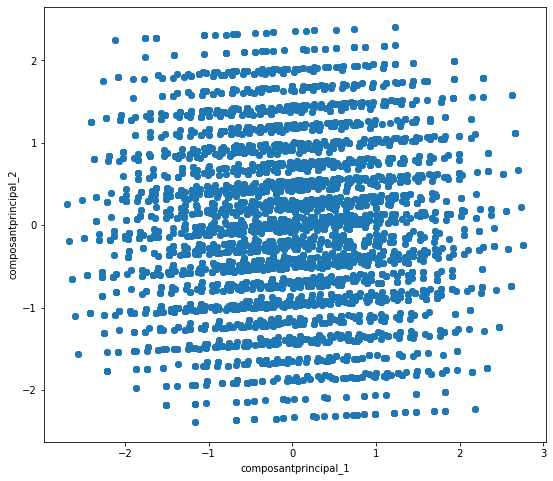

In [ ]:
#3 choix de réponses à cette question

#cas 1 sans annotate
plt.figure(figsize=(9,8))
#j'ai utilise plt.scatter ici  pour faire le PCA 
plt.scatter(principal_composants[:,0], principal_composants[:,1])
plt.xlabel('composantprincipal_1')
plt.ylabel('composantprincipal_2')



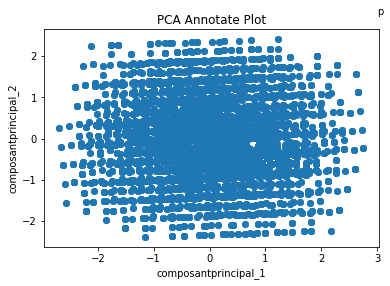

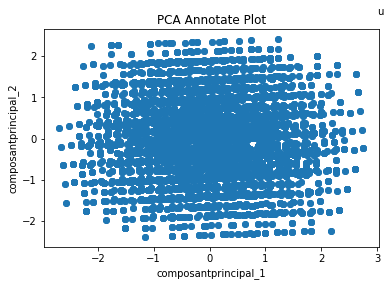

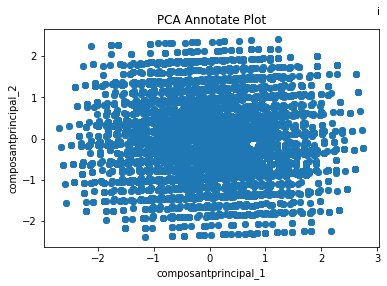

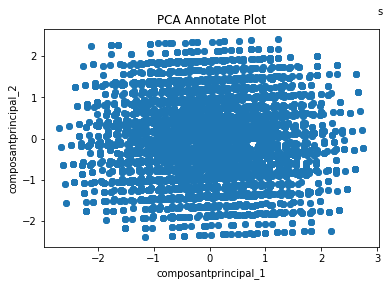

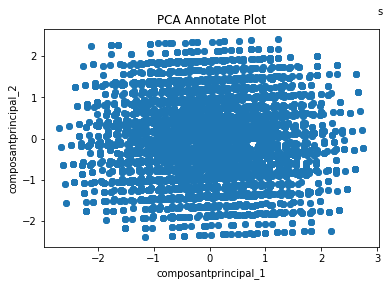

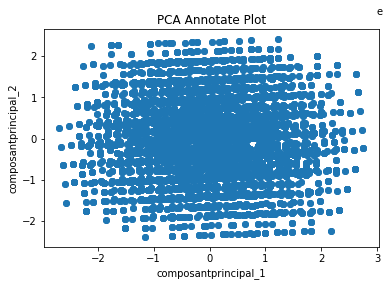

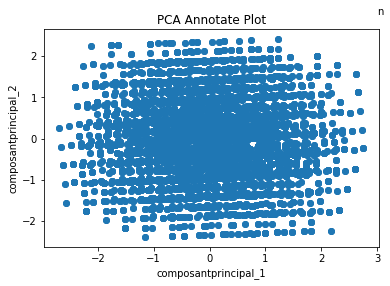

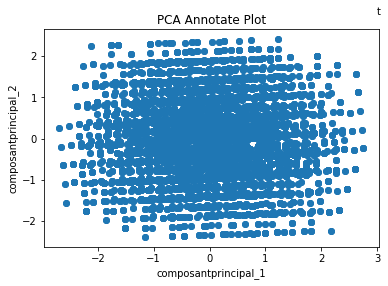

In [ ]:
#cas 2 avec annotate et scatter
xs=principal_composants[:,0]
ys=principal_composants[:,1]
#annoter les mots de la sixième phrase du corpus par exemple
for i, w in enumerate(sentences[16]):
    plt.title("PCA Annotate Plot")
    #j'ai pas réussi à avoir de graphe pour plt.annotate mais j'ai tenté d'utiliser plt.plot et plt.annotate tous les deux dans les fenêtres en dessous 
    #mais ça ne fait pas l'effet attendu
    plt.scatter(xs, ys)
    plt.xlabel('composantprincipal_1')
    plt.ylabel('composantprincipal_2')
    plt.annotate(w, xy=(xs[i],ys[i]),xytext = (3, 3))
    plt.show()

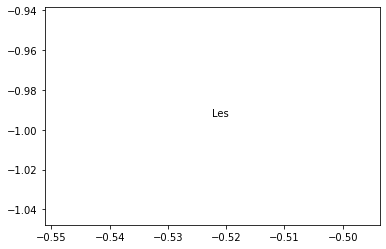

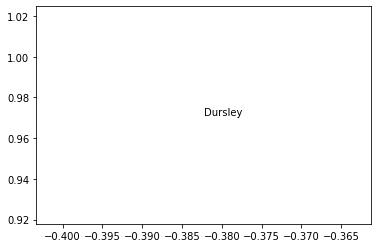

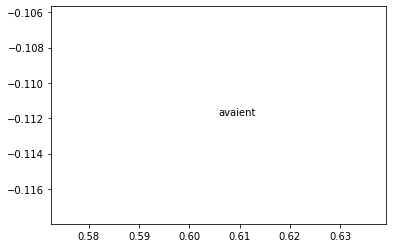

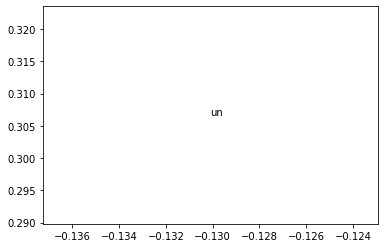

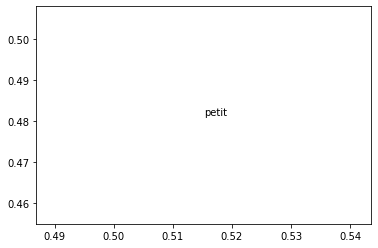

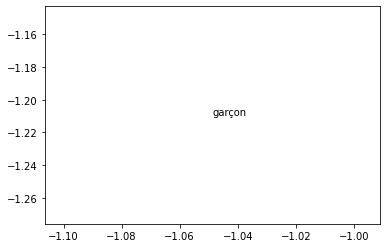

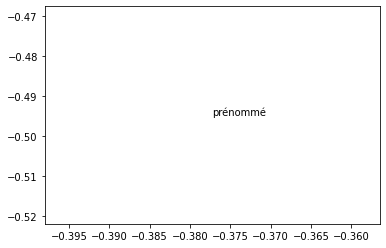

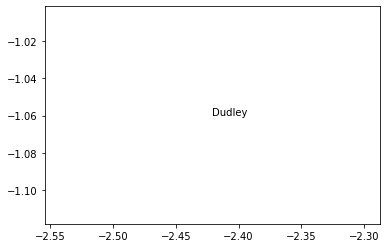

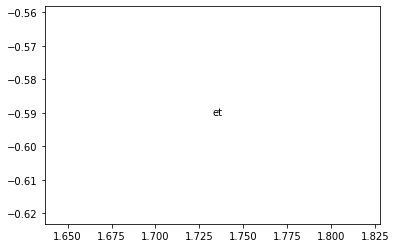

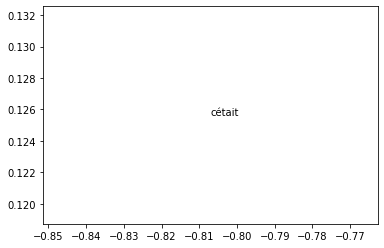

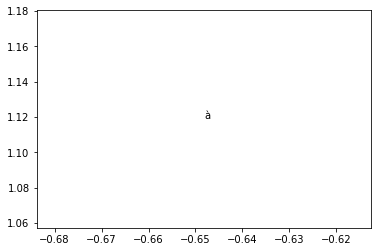

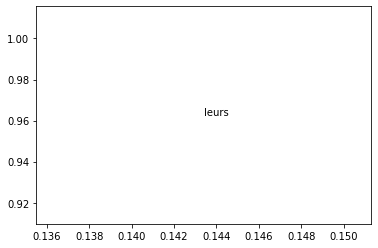

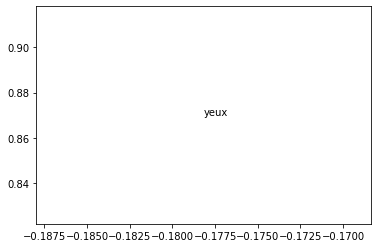

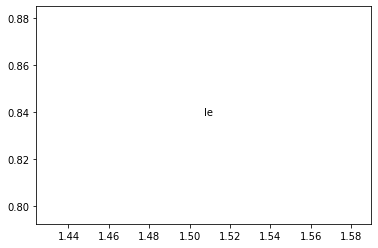

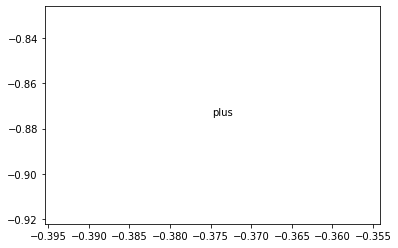

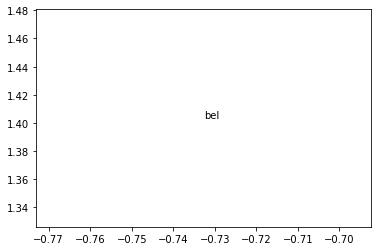

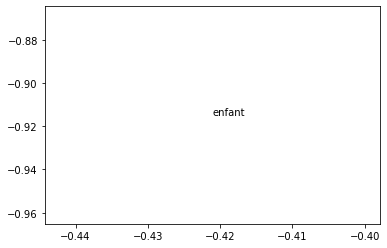

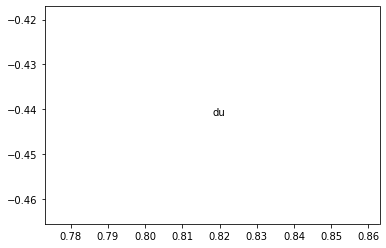

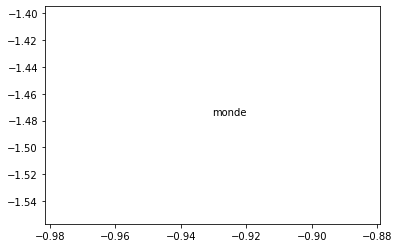

In [ ]:
#choix 3 avec plot et annotate
for i, w in enumerate(sentences[6]):
  #ajouter du titre
  #ajout du plot
  #j'ai pas réussi à avoir de graphe pour plt.annotate mais j'ai tenté d'utiliser plt.plot et plt.annotate tous les deux dans les fenêtres en dessous 
    #mais ça ne fait pas l'effet attendu
  plt.plot(xs[i],ys[i],color='g')
  plt.annotate(w,xy=(xs[i],ys[i]))
  plt.show()